# TODO:
- Create model and layers
- Review the differences in layers (mostly looking at the first numerical argument in the layer creation)
- Use a subset of the train/test data to create MVP

In [1]:
import sklearn as sk
from keras import layers, models, optimizers
from keras.preprocessing.image import ImageDataGenerator, load_img, array_to_img
import matplotlib.pyplot as plt
import os
import datetime
import pandas as pd
import numpy as np

/usr/local/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
## Setup constants
IMAGE_SHAPE=(128, 128, 3)

DATA_DIR = '../data'
DATA_FABRICATED_DIR = os.path.join(DATA_DIR, 'fabricated')

#IMAGE_TEST_DIR = os.path.join(DATA_FABRICATED_DIR, 'hands_test')
IMAGE_TEST_DIR = os.path.join(DATA_FABRICATED_DIR, 'small_hands_test')
#IMAGE_VALIDATION_DIR = os.path.join(DATA_FABRICATED_DIR, 'hands_validation')
IMAGE_VALIDATION_DIR = os.path.join(DATA_FABRICATED_DIR, 'small_hands_validation')
#IMAGE_TRAIN_DIR = os.path.join(DATA_FABRICATED_DIR, 'hands_train')
IMAGE_TRAIN_DIR = os.path.join(DATA_FABRICATED_DIR, 'small_hands_train')

SAVED_MODEL_DIR = os.path.join(DATA_DIR, 'models')

In [3]:
def create_model():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=[IMAGE_SHAPE[0], IMAGE_SHAPE[1], IMAGE_SHAPE[2]]))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(1, activation='sigmoid'))
    
    model.compile(loss='binary_crossentropy',
                  optimizer=optimizers.RMSprop(lr=1e-4),
                  #optimizer='rmsprop',
                  metrics=['acc'])
    return model

create_model()

In [4]:
def create_data_generator():
    # All images will be rescaled by 1./255
    train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,)
    validation_datagen = ImageDataGenerator(rescale=1./255)

    train_generator = train_datagen.flow_from_directory(
            # This is the target directory
            IMAGE_TRAIN_DIR,
            target_size=[IMAGE_SHAPE[0], IMAGE_SHAPE[1]],
            batch_size=20,
            # Since we use binary_crossentropy loss, we need binary labels
            class_mode='binary')

    validation_generator = validation_datagen.flow_from_directory(
            IMAGE_VALIDATION_DIR,
            target_size=[IMAGE_SHAPE[0], IMAGE_SHAPE[1]],
            batch_size=20,
            class_mode='binary')
    
    return [train_generator, validation_generator]

create_data_generator()

Found 1335 images belonging to 2 classes.
Found 175 images belonging to 2 classes.


In [5]:
model = create_model()
train_generator, validation_generator = create_data_generator()

history = model.fit_generator(
      train_generator,
      epochs=120,
      validation_data=validation_generator
)

Found 1335 images belonging to 2 classes.
Found 175 images belonging to 2 classes.
Epoch 1/120
67/67 [==============================] - 45s 679ms/step - loss: 0.6275 - acc: 0.6468 - val_loss: 1.1048 - val_acc: 0.3143
Epoch 2/120
67/67 [==============================] - 43s 635ms/step - loss: 0.5554 - acc: 0.7157 - val_loss: 1.0703 - val_acc: 0.3257
Epoch 3/120
67/67 [==============================] - 40s 593ms/step - loss: 0.5412 - acc: 0.7388 - val_loss: 1.2264 - val_acc: 0.3029
Epoch 4/120
67/67 [==============================] - 39s 583ms/step - loss: 0.5183 - acc: 0.7515 - val_loss: 1.2209 - val_acc: 0.3257
Epoch 5/120
67/67 [==============================] - 38s 560ms/step - loss: 0.5129 - acc: 0.7470 - val_loss: 1.0265 - val_acc: 0.3200
Epoch 6/120
67/67 [==============================] - 38s 564ms/step - loss: 0.4920 - acc: 0.7512 - val_loss: 1.1839 - val_acc: 0.3143
Epoch 7/120
67/67 [==============================] - 39s 581ms/step - loss: 0.4790 - acc: 0.7696 - val_loss: 1.02

67/67 [==============================] - 38s 571ms/step - loss: 0.2092 - acc: 0.9132 - val_loss: 0.3006 - val_acc: 0.9029
Epoch 62/120
67/67 [==============================] - 39s 582ms/step - loss: 0.2185 - acc: 0.9020 - val_loss: 0.4206 - val_acc: 0.8171
Epoch 63/120
67/67 [==============================] - 39s 577ms/step - loss: 0.2208 - acc: 0.9087 - val_loss: 0.2810 - val_acc: 0.9086
Epoch 64/120
67/67 [==============================] - 39s 586ms/step - loss: 0.2116 - acc: 0.9134 - val_loss: 0.3039 - val_acc: 0.9086
Epoch 65/120
67/67 [==============================] - 38s 574ms/step - loss: 0.2197 - acc: 0.9027 - val_loss: 0.1951 - val_acc: 0.9371
Epoch 66/120
67/67 [==============================] - 39s 581ms/step - loss: 0.2081 - acc: 0.9105 - val_loss: 0.2061 - val_acc: 0.9257
Epoch 67/120
67/67 [==============================] - 38s 562ms/step - loss: 0.1988 - acc: 0.9127 - val_loss: 0.2339 - val_acc: 0.9257
Epoch 68/120
67/67 [==============================] - 38s 566ms/step

In [6]:
train_generator, validation_generator = create_data_generator()
def show_images_for_generator(generator):
    cnt = 0
    batch = next(generator)
    print(batch[1])
    #print(batch[0][0])
    for img in batch[0]:
        cnt += 1
        plt.figure(cnt)

        imgplot = plt.imshow(array_to_img(img))
        if cnt == 5:
            break

Found 1335 images belonging to 2 classes.
Found 175 images belonging to 2 classes.


[1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0.]


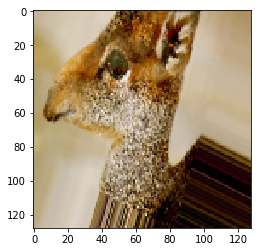

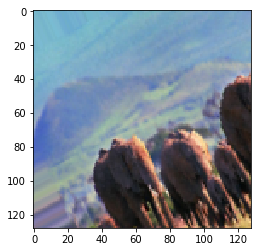

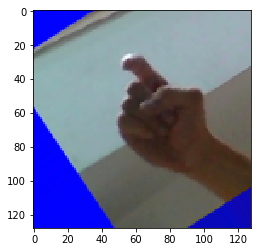

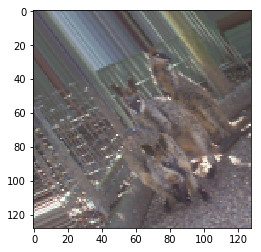

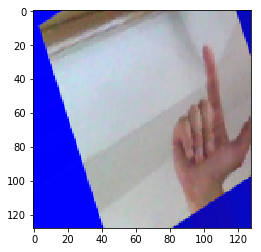

In [7]:
show_images_for_generator(train_generator)

In [8]:
# show_images_for_generator(validation_generator)

## Test Model

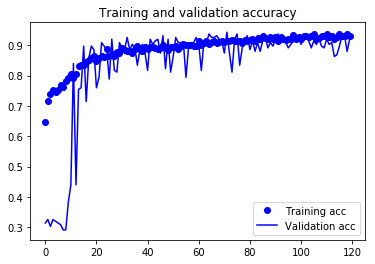

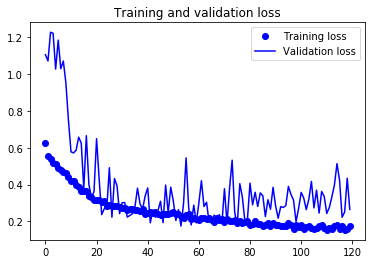

In [9]:
def desplay_trajectory(history):
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

    plt.show()
desplay_trajectory(history)

### Test model using unseen images

In [10]:

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        IMAGE_TEST_DIR,
        target_size=(IMAGE_SHAPE[0], IMAGE_SHAPE[1]),
        batch_size=82,
        class_mode='binary')

Found 118 images belonging to 2 classes.


In [11]:
batch = next(test_generator)
images = batch[0]
classes = batch[1]
predictions = model.predict(images)

In [12]:
image_map = {}
i = 0
for image in images:
    image_map[i] = image
    i += 1

In [13]:
test_image_results = pd.DataFrame({
    'images': list(image_map.keys()),
    'prediction': predictions.flatten(),
    'classes': classes
}) \
.sort_values('prediction', ascending=False)

test_image_results

classes  images    prediction
22      1.0      22  9.999759e-01
31      1.0      31  9.993802e-01
37      1.0      37  9.991854e-01
41      1.0      41  9.975988e-01
46      1.0      46  9.972452e-01
75      1.0      75  9.966367e-01
2       1.0       2  9.963642e-01
27      1.0      27  9.962768e-01
33      1.0      33  9.961386e-01
9       1.0       9  9.959521e-01
36      1.0      36  9.959167e-01
53      1.0      53  9.957961e-01
77      1.0      77  9.922025e-01
18      1.0      18  9.852651e-01
11      1.0      11  9.807929e-01
25      1.0      25  9.793648e-01
67      1.0      67  9.788138e-01
61      1.0      61  9.778377e-01
1       1.0       1  9.776618e-01
47      1.0      47  9.734698e-01
21      1.0      21  9.671288e-01
73      1.0      73  9.585135e-01
69      1.0      69  9.561563e-01
30      1.0      30  8.600739e-01
60      1.0      60  8.044941e-01
7       1.0       7  7.813458e-01
70      1.0      70  7.653506e-01
48      1.0      48  7.360679e-01
72      1.0      72  6.834220e-01
35      1.0      35  6.650248e-01
..      ...     ...           ...
64      0.0      64  1.592464e-04
5       0.0       5  2.865075e-05
29      0.0      29  9.324168e-06
10      0.0      10  3.972650e-06
19      0.0      19  3.281925e-06
42      0.0      42  1.205657e-06
14      0.0      14  7.432106e-07
12      0.0      12  6.168530e-07
56      0.0      56  4.821231e-07
57      0.0      57  3.206920e-07
78      0.0      78  2.285550e-07
43      0.0      43  1.976044e-07
38      0.0      38  1.713933e-07
0       0.0       0  6.045212e-08
55      0.0      55  4.992661e-08
81      0.0      81  4.762531e-08
44      0.0      44  3.257392e-08
15      0.0      15  3.031132e-08
3       0.0       3  2.345290e-08
51      0.0      51  1.858380e-08
45      0.0      45  1.499243e-08
71      0.0      71  1.414034e-08
52      0.0      52  1.354316e-08
54      0.0      54  1.329787e-08
80      0.0      80  1.147672e-08
23      0.0      23  1.042773e-08
8       0.0       8  4.838340e-09
62      0.0      62  3.666241e-09
65      0.0      65  8.132076e-10
16      0.0      16  5.180687e-11

[82 rows x 3 columns]

In [14]:

def show_images(images, cols = 1, titles = None):
    """Display a list of images in a single figure with matplotlib.
    
    Parameters
    ---------
    images: List of np.arrays compatible with plt.imshow.
    
    cols (Default = 1): Number of columns in figure (number of rows is 
                        set to np.ceil(n_images/float(cols))).
    
    titles: List of titles corresponding to each image. Must have
            the same length as titles.
    """
    assert((titles is None)or (len(images) == len(titles)))
    n_images = len(images)
    if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    fig = plt.figure()
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
        plt.imshow(image)
        a.set_title(title)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
    plt.show()

In [15]:
# fnames = [os.path.join(IMAGE_TEST_DIR, fname) for fname in test_image_results.filename]

#imgs = [load_img(fname, target_size=(100,100)) for fname in fnames]
imgs = [array_to_img(image_map[img]) for img in test_image_results.images]
show_images(imgs, 5, test_image_results.prediction)

## Save Model

In [16]:
def ensure_model_directory_exists():
    try:
        os.mkdir(SAVED_MODEL_DIR)
    except:
        print('Tried to create "{}" but it already exists'.format(SAVED_MODEL_DIR))

def save_model():
    ensure_model_directory_exists()
    
    evaluate_model_with_test_data = model.evaluate_generator(test_generator)

    accuracy_of_model = evaluate_model_with_test_data[-1]
    timestamp_raw = str(datetime.datetime.now())
    timestamp_without_milliseconds = timestamp_raw.split('.')[0]
    
    model_filename = '{}___{}.h5'.format(timestamp_without_milliseconds, accuracy_of_model)
    model_filepath = os.path.join(SAVED_MODEL_DIR, model_filename)
    
    print('saving file {}'.format(model_filepath))

    model.save(model_filepath)
save_model()

Tried to create "../data/models" but it already exists
saving file ../data/models/2018-10-09 17:42:57___0.898305085756011.h5
